In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diabetes.csv')

In [3]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
92409,Female,15.0,0,0,No Info,33.28,6.0,126,0
69330,Male,8.0,0,0,No Info,20.02,5.8,159,0
38997,Female,45.0,0,0,current,27.25,6.0,85,0
23677,Female,18.0,0,0,never,17.11,6.2,130,0
98048,Female,56.0,0,0,No Info,27.32,5.7,80,0


In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
# Convert categorical variables to numerical 
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})  # Female 1, Male 0
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
17630,1.0,72.0,0,0,never,27.32,5.8,140,1
60724,1.0,65.0,0,0,No Info,27.32,4.0,85,0
52476,1.0,66.0,0,1,not current,31.44,6.2,145,0
25451,1.0,40.0,1,0,No Info,27.32,4.5,140,0
29860,0.0,51.0,0,0,No Info,27.32,4.0,159,0


In [7]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [8]:
# Convert categorical variables to numerical
# No Info      0
# never        1
# current      2 
# former       3
# ever         4
# not current  5
df['smoking_history'] = df['smoking_history'].map({'No Info': 0,
                                                   'never': 1,
                                                   'current': 2,
                                                   'former': 3,
                                                   'ever': 4,
                                                   'not current': 5})

df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
83414,1.0,37.0,0,0,1,21.28,6.5,126,0
16077,1.0,52.0,0,0,0,28.36,4.5,85,0
78302,1.0,78.0,0,0,1,24.60,7.5,140,1
17294,0.0,33.0,0,0,0,38.22,4.8,160,0
57111,1.0,10.0,0,0,1,26.79,6.1,200,0


In [9]:
df['smoking_history'].unique()

array([1, 0, 2, 3, 4, 5], dtype=int64)

In [10]:
df.isnull().sum()


gender                 18
age                     0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
HbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

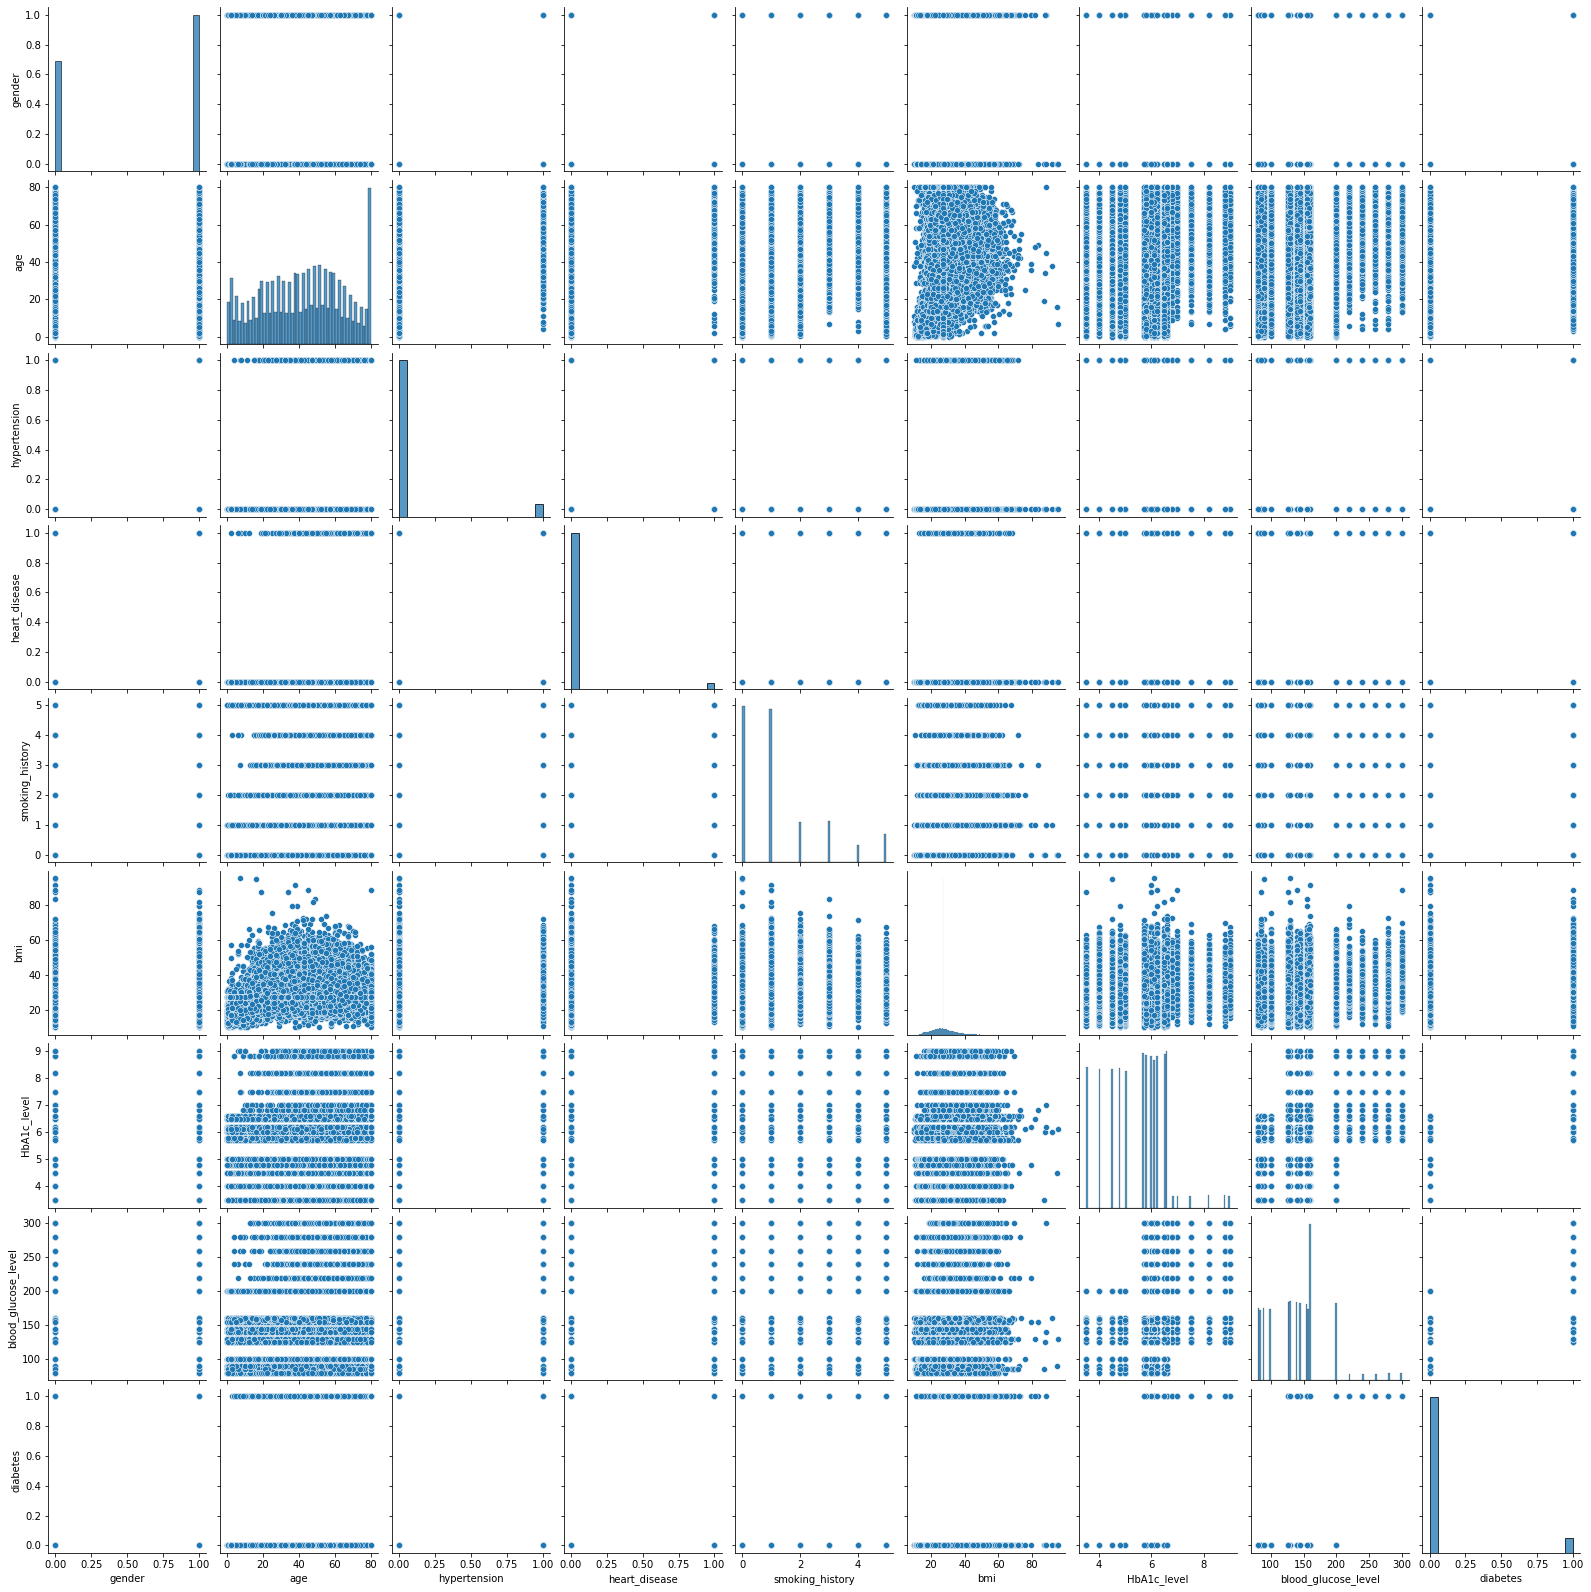

In [18]:
sns.pairplot(df)
plt.show()

In [13]:
# Split the Data into Features and Target
X = df.drop('diabetes', axis=1)  # Features
y = df['diabetes']  # Target

In [14]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [16]:
# Make Predictions
y_pred = model.predict(X_test)

Accuracy: 0.95


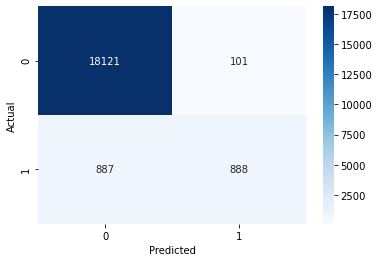

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18222
           1       0.90      0.50      0.64      1775

    accuracy                           0.95     19997
   macro avg       0.93      0.75      0.81     19997
weighted avg       0.95      0.95      0.94     19997



In [17]:
# Evaluate the Model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

In [19]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

Accuracy: 0.96


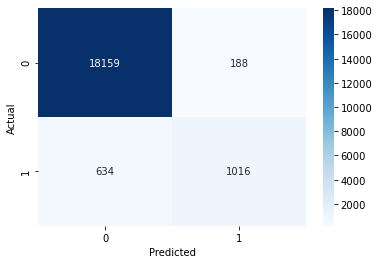

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18347
           1       0.84      0.62      0.71      1650

    accuracy                           0.96     19997
   macro avg       0.91      0.80      0.84     19997
weighted avg       0.96      0.96      0.96     19997



In [22]:
# Evaluate the Model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\snkty\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [34]:
y_pred = model.predict(X_test)

Accuracy: 0.96


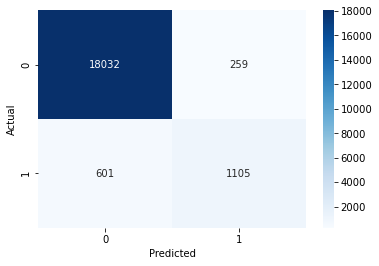

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18291
           1       0.81      0.65      0.72      1706

    accuracy                           0.96     19997
   macro avg       0.89      0.82      0.85     19997
weighted avg       0.95      0.96      0.95     19997



In [35]:
# Evaluate the Model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))